**Acknowledgement**: https://github.com/AustinLBuchanan/Combinatorial-Optimization-in-Gurobi

In [ ]:
# Author: Vanshika Gupta
# Jointly with: Prof Chrysafis Vogiatzis 

# Problem: Clique relaxation - find maximum such structure such that each node is adjacent to at least |S| − k nodes in the same structure

In [1]:
from gurobipy import *
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

#### Data

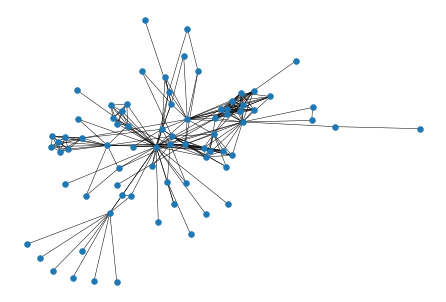

In [2]:
G=nx.les_miserables_graph()
V = G.number_of_nodes()
k = 3

pos=nx.spring_layout(G)
nx.draw(G,pos,node_size=30,width=0.5)

#### Create Model & Variables

In [3]:
model = Model("kGraph")

x = model.addVars( G.nodes, vtype=GRB.BINARY)

Academic license - for non-commercial use only - expires 2022-09-08
Using license file /home/vanshika/gurobi.lic


#### Constraint

In [4]:
expr1 = 0
for i in G.nodes():
    expr1 += x[i]
        
model.addConstrs(( V - k )*( 1 - x[i] ) + quicksum( x[j] for j in G.neighbors(i) ) >= expr1 - k for i in G.nodes) 

{'Napoleon': <gurobi.Constr *Awaiting Model Update*>,
 'Myriel': <gurobi.Constr *Awaiting Model Update*>,
 'MlleBaptistine': <gurobi.Constr *Awaiting Model Update*>,
 'MmeMagloire': <gurobi.Constr *Awaiting Model Update*>,
 'CountessDeLo': <gurobi.Constr *Awaiting Model Update*>,
 'Geborand': <gurobi.Constr *Awaiting Model Update*>,
 'Champtercier': <gurobi.Constr *Awaiting Model Update*>,
 'Cravatte': <gurobi.Constr *Awaiting Model Update*>,
 'Count': <gurobi.Constr *Awaiting Model Update*>,
 'OldMan': <gurobi.Constr *Awaiting Model Update*>,
 'Valjean': <gurobi.Constr *Awaiting Model Update*>,
 'Labarre': <gurobi.Constr *Awaiting Model Update*>,
 'Marguerite': <gurobi.Constr *Awaiting Model Update*>,
 'MmeDeR': <gurobi.Constr *Awaiting Model Update*>,
 'Isabeau': <gurobi.Constr *Awaiting Model Update*>,
 'Gervais': <gurobi.Constr *Awaiting Model Update*>,
 'Listolier': <gurobi.Constr *Awaiting Model Update*>,
 'Tholomyes': <gurobi.Constr *Awaiting Model Update*>,
 'Fameuil': <gurobi.

#### Optimize

In [5]:
model.setObjective( quicksum( x[i] for i in G.nodes() ), GRB.MAXIMIZE)

model.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 77 rows, 77 columns and 5421 nonzeros
Model fingerprint: 0x5dc4ef5a
Variable types: 0 continuous, 77 integer (77 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [8e+01, 8e+01]
Found heuristic solution: objective 4.0000000
Presolve added 2 rows and 2 columns
Presolve time: 0.00s
Presolved: 79 rows, 79 columns, 4809 nonzeros
Variable types: 0 continuous, 79 integer (77 binary)

Root relaxation: objective 3.907512e+01, 110 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   39.07512    0   79    4.00000   39.07512   877%     -    0s
H    0     0                       7.0000000   39.07512   458%

#### Draw

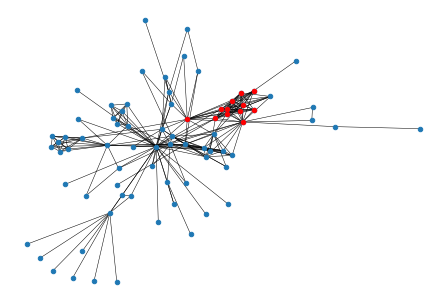

In [6]:
parts = []

nx.draw(G,pos,node_size=20,width=0.5)
for i in G.nodes():
    if(x[i].X > 0.5):
        parts.append(i)
        nx.draw_networkx_nodes(G,pos,nodelist=[i],node_color='red',node_size=20)

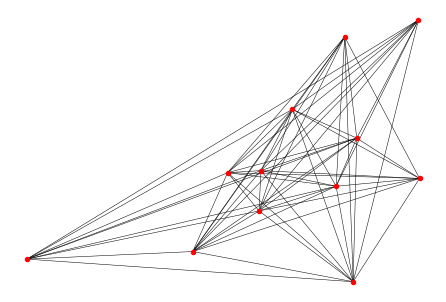

In [7]:
nx.draw(G.subgraph(parts), pos, node_size=20, node_color='red', width=0.5)